<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


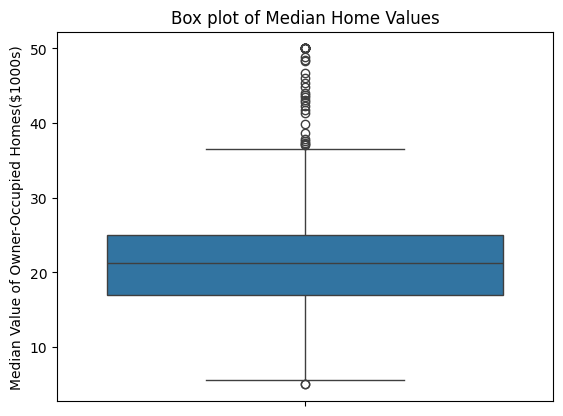

In [12]:
sns.boxplot(y=boston_df['MEDV'])
pyplot.ylabel('Median Value of Owner-Occupied Homes($1000s)')
pyplot.title('Box plot of Median Home Values')
pyplot.show()
# This boxplot displays the median value of homes

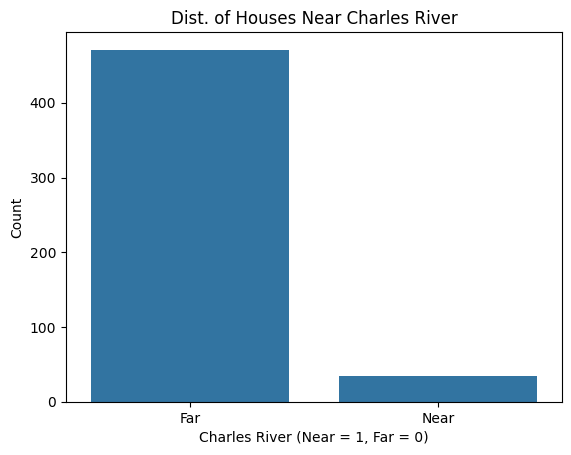

In [11]:
sns.countplot(x=boston_df['CHAS'])
pyplot.xlabel('Charles River (Near = 1, Far = 0)')
pyplot.ylabel('Count')
pyplot.title('Dist. of Houses Near Charles River')
pyplot.xticks([0,1],['Far','Near'])
pyplot.show()
# This bar chart displays the distribution of houses near or far from the river.

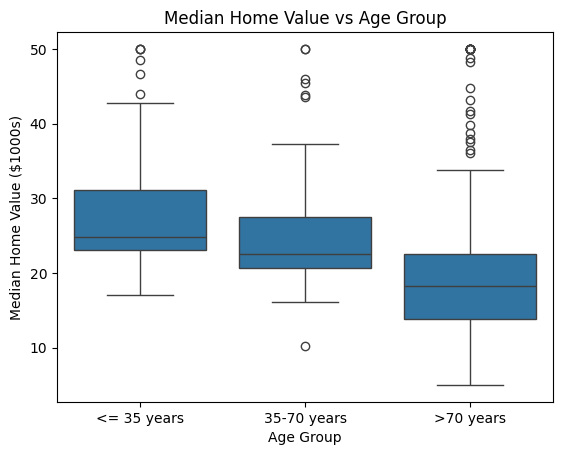

In [14]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels= ['<= 35 years', '35-70 years','>70 years'])
sns.boxplot(x='AGE_GROUP', y= 'MEDV', data=boston_df)
pyplot.title('Median Home Value vs Age Group')
pyplot.ylabel('Median Home Value ($1000s)')
pyplot.xlabel('Age Group')
pyplot.show()
# This box plot displays the median home values grouped by age.

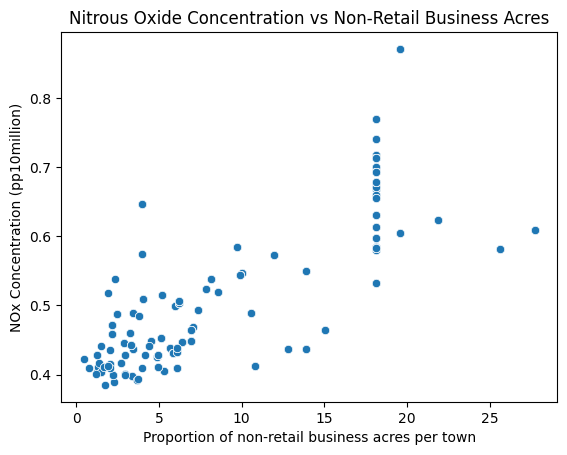

In [16]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Nitrous Oxide Concentration vs Non-Retail Business Acres')
pyplot.xlabel('Proportion of non-retail business acres per town')
pyplot.ylabel('NOx Concentration (pp10million)')
pyplot.show()
# This scatter plot displays the relationship between NOX concentration and retail business acres.

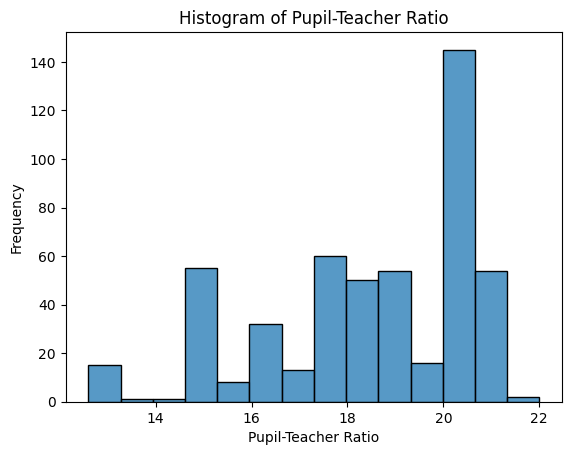

In [18]:
sns.histplot(boston_df['PTRATIO'])
pyplot.title('Histogram of Pupil-Teacher Ratio')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()
# This histogram displays the frequency of pupil to teachers.

In [45]:
# H0 = There is no significant difference in median home values based on proximity to the river.
# Ha = There is significant difference in median home values.


near_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
far_from_river = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_statistic, p_value = scipy.stats.ttest_ind(near_river, far_from_river)
print('T-statistic = ', t_statistic)
print('P-value = ',p_value)
alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis. There is significant difference in median values based on proximity to the river.')
else:
    print('Failed to reject null hypothesis. There is no significant difference in home values.')

T-statistic =  3.996437466090509
P-value =  7.390623170519905e-05
Reject null hypothesis. There is significant difference in median values based on proximity to the river.


In [46]:
# H0 = There is no significant difference in median home value by age.
# Ha = There is significant difference in median home values.


f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['AGE_GROUP'] == '<= 35 years']['MEDV'],
                                            boston_df[boston_df['AGE_GROUP'] == '35-70 years']['MEDV'],
                                            boston_df[boston_df['AGE_GROUP'] == '>70 years']['MEDV'])
print('F-statistic = ', f_statistic)
print('P-value = ', p_value)
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is significant difference in value by age.')
else:
    print('Fail to reject null hypothesis. There is no significant difference in value.')

F-statistic =  36.40764999196599
P-value =  1.7105011022702984e-15
Reject the null hypothesis. There is significant difference in value by age.


In [47]:
# H0 = There is no significant difference in NOX concentration by non-retail business acres.
# Ha = There is significant difference in NOX concentration.


correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Pearson Correlation Coefficient is {correlation_coefficient}')
print(f'p_value = {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is significant difference in nitrous oxide by non-retail business acres.')
else:
    print('Fail to reject null hypothesis. There is no significant difference.')

Pearson Correlation Coefficient is 0.7636514469209192
p_value = 7.913361061210442e-98
Reject the null hypothesis. There is significant difference in nitrous oxide by non-retail business acres.


In [44]:
X = sm.add_constant(boston_df['DIS'])
model = sm.OLS(boston_df['MEDV'], X).fit()
print(model.summary())

# The coefficient to DIS is 1.0916. This means for every increase in the distance between a home and an employment center, the median home value decreases.
# The p-value is <0.05 indicating that it is statistically significant.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        16:52:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0